![title](./images/logo_nao_digital.png)

# Tema 1: Conocimientos sobre Pandas

## 1. Objetivo

Procesar en Python la información entregada por el equipo de Ingeniería de datos de Oilst de forma funcional para el análisis de los retrasos en las órdenes de los clientes.

## Datos de Oilst

Cómo se ha mencionado en el Anexo A, se ha provisto la siguiente información al equipo de `Brasil BI Consulting:`

| Archivo                      	| Descripción                                                                                                                                     	| Formato 	|
|------------------------------	|-------------------------------------------------------------------------------------------------------------------------------------------------	|---------	|
| olist_customers_dataset      	| Datos de identificación de los clientes y la ubicación del domicilio que tienen registrado con Olist para recibir pedidos.                      	| xlsx    	|
| olist_orders_dataset         	| Datos de identificación de las órdenes realizadas por los clientes, su estatus de envío y la cronología de entrega en el domicilio del cliente. 	| csv     	|
| olist_geolocation_dataset    	| Datos de geolocalización de códigos postales de zonas de Brasil.                                                                                	| csv     	|
| olist_order_items_dataset    	| Contiene la relación de artículos contenidos en las órdenes de los clientes                                                                     	| csv     	|
| olist_order_payments_dataset 	| Contiene la relación de pagos que cada cliente hizo en sus órdenes por medio de pago                                                            	| csv     	|
| states_abreviations          	| Contiene la relación de nombres de los estados de Brasil y sus abreviaciones.                                                                   	| json    	|


Adicionalmente, también se tiene el diagrama de relación entre las tablas:

![title](./images/olist_diagram.png)



Este documento se desarrollarán scripts en Python que permitan procesar la  la información de Olist para realizar posteriormente el análisis de sus datos

## 2. Librerias de trabajo

In [57]:
# Instala libreria Pandas si no la tenemos
!pip install pandas -y
!pip install openpyxl -y
!pip install matplotlib.pyplot -y


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -

In [59]:
import os
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos

Primero nos encargaremos de leer los datos, indicando a Python donde se encuentra la carpeta que contiene los datos y los nombres de los archivos relevantes para el análisis.

In [60]:
# Indicamos la ruta a la carpeta de de tu computadora 
# donde se ubican los datos del E-commerce
# Ejemplo: "C:\Usuarios\[tu nombre]\Descargas"

DATA_PATH="C:\\Users\\Natalia\\Recursos DN_COM_58"

Ahora procederemos a definir variables que indiquen el nombre de los archivos junto con su extensión (por ejemplo, `.csv`, `.json` u otra).

In [61]:
FILE_CUSTOMERS = 'olist_customers_dataset.xlsx'
FILE_GEOLOCATIONS = 'olist_geolocation_dataset.csv'

# completa los nombres del resto de los archivos con su extesion (ejemplo .csv) ...
FILE_ITEMS = 'olist_order_items_dataset.csv'
FILE_PAYMENTS = 'olist_order_payments_dataset.csv'
FILE_ORDERS = 'olist_orders_dataset.csv'
FILE_STATES_ABBREVIATIONS = 'states_abbreviations.json'

Echaremos mano de la utilidad `os.path.join` de Python que indicar rutas en tu computadora donde se ubican archivos, así Pandas encontrá los archivos de datos.


**Ejemplo**

A continuación mostraremos un ejemplo leyendo el archivo `olist_geolocation_dataset.csv`:

In [62]:
# Ejemplo
print(f"C:\\Users\\Natalia\\Recursos DN_COM_58: {FILE_GEOLOCATIONS}")
print(os.path.join(DATA_PATH, FILE_GEOLOCATIONS))

C:\Users\Natalia\Recursos DN_COM_58: olist_geolocation_dataset.csv
C:\Users\Natalia\Recursos DN_COM_58\olist_geolocation_dataset.csv


In [63]:
# Leemos con pandas
geolocations = pd.read_csv(
    os.path.join(DATA_PATH, FILE_GEOLOCATIONS),
    dtype={'geolocation_zip_code_prefix': 'str'}
    )

Podemos explorar el archivo con los comandos `.head(), .info(), .describe()`

**Función .head()**

Este comando nos brinda información de los primeros renglones de la tabla:

In [64]:
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


**Función .describe()**

Este comando nos ayuda obtener información estadística de las variables de la tabla, entre ellas el conteo de los elementos no nulos de una columnas, la media, su desviación estándar (que es una medida de que tan dispersa se encuentra la información a partir de su media), el primer, segundo y tercer cuartil de los datos 
que se refiere a que valor de los datos ocupar el 25%, 50% y 75% de la distribución de los datos si se ordenan de menor a mayor y que se denotan, respectivamente como, denotado Q1, Q2 y Q3. Además provee información del mínimo y máximo presentes en la columna.

In [65]:
geolocations .describe()

,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06
mean,-2.117615e+01,-4.639054e+01
std,5.715866e+00,4.269748e+00
min,-3.660537e+01,-1.014668e+02
25%,-2.360355e+01,-4.857317e+01
50%,-2.291938e+01,-4.663788e+01
75%,-1.997962e+01,-4.376771e+01
max,4.506593e+01,1.211054e+02


**Función .info()**

Este comando nos ayuda obtener información de cuantas entradas tiene una tabla, el tipo de dato en que se representarn sus columnas y el tamaño que ocupa en la memoria de nuestra computadora.

In [66]:
geolocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


Ahora estamos en posición de completar el código para el resto de conjuntos de datos:

### 3.1 Archivo olist_customers_dataset

**Hint:** 

1. Pandas necesita instalar una libreria extrar para leer éste tipo de archivos (`openpyxl`).
2. Se debe expecificar el tipo de dato de `customer_zip_code_prefix` (ver Anexo A)

In [68]:
customers = pd.read_excel(
    os.path.join(DATA_PATH, FILE_CUSTOMERS),
    # Especificar el tipo de dato de customer_zip_code_prefix
    dtype={'customer_zip_code_prefix': "str"}
    )

Verificamos que `customer_zip_code_prefix` tenga el formato correcto (Ojo: !no es un número, sino un código postal!)

In [69]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


También podemos visualizar una muestra aleatoria con el método `.sample(numero_entero)`

In [70]:
# Revisamos 10 renglones al azar
customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58589,61d3ef4b7ba001ec1b14d21c3699bba2,ecb9584f5574a2e2479f2421b3892ad5,09041,santo andre,SP
51248,259d52789dc5f2323c01238c73a28abc,39bd660f04727f543f878c1e1103e2df,05871,sao paulo,SP
17081,47166f88862447ea5f8e078b2aaefb46,5d0f9e059b388d11c92560a0031b97d2,28908,cabo frio,RJ
71054,cb68d5f9e36d9b5789508f8aeade936a,d815021b4d2400e191b912e96d494b2a,88080,florianopolis,SC
53639,dd1334e544ce77604d3da0793d6a6c80,b497d4b2853982360d372d87c76e44f5,22451,rio de janeiro,RJ
73110,d3588db32cf2e767d97e157a9b9a753b,a965a10f2becee90e286f026cbce4dac,06023,osasco,SP
80598,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,01525,sao paulo,SP
42108,4d36f99640ab0dd5ce16ddc05ea49857,dcd933f6d14ad386563dbebb020e4cbf,06501,santana de parnaiba,SP
90826,c85790678eba7034f14f08ee44c67c21,ed917c786a8a3e411eae87aeca27cb27,98005,cruz alta,RS
82279,5ce71cdf0f83ff207aee90e0069e1f42,cb666b9b7a62b6613db96d13c58f7292,15805,catanduva,SP


### 3.2 Archivo olist_order_items_dataset

In [71]:
items = pd.read_csv(
    os.path.join(DATA_PATH, FILE_ITEMS),
    # Completa la ubicacion usando os.path.join, DATA_PATH y
    # el nombre del archivo FILE_ITEMS
    )

Como sabemos, este conjunto contiene datos de los productos que contiene cada orden. Por ello, para el análisis nos interesará saber cual es la cantidad de productos en cada orden y el precio total de las mismas.

Esto se puede calcular mediante agregaciones de Pandas (https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html), que basicamente nos permite hacer cálculos para un grupo en especial. En el ejemplo de inferior se muestra para cada `order_id` se cuenta la cantidad de productos (items) y el precio agregado de todos los artículos en las órdenes:

In [72]:
items_agg = items.groupby(
    ['order_id']).agg(
        # conteo de producto
        {'order_item_id': 'count',
        # suma de los precios de los artículos
        'price': 'sum'}
                      ).reset_index() 

In [73]:
items_agg.head()

,order_id,order_item_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,239.90
2,000229ec398224ef6ca0657da4fc703e,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90


Vamos a renombrar las columnas anteriores, para que sea más intuitivo su significado.

In [74]:
# Nota: el parámetro inplace sobre escribe los cambios
# en el dataframe
items_agg.rename(
    columns={'order_item_id': 'total_products', 'price': 'total_sales'},
    inplace=True
    )

In [75]:
items_agg

,order_id,total_products,total_sales
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,239.90
2,000229ec398224ef6ca0657da4fc703e,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,1,350.00
98663,fffce4705a9662cd70adb13d4a31832d,1,99.90
98664,fffe18544ffabc95dfada21779c9644f,1,55.99


Vamos a repetir el proceso anterior para el resto de tablas:

### 3.3 olist_order_payments_dataset

In [76]:
payments = pd.read_csv(
    os.path.join(DATA_PATH, FILE_PAYMENTS),
    # Completa la ubicacion usando os.path.join, DATA_PATH y
    # el nombre del archivo correspondiente a los pagos
    )

### 3.4 states_abbreviations

In [77]:
states_abbreviations = pd.read_json(
    os.path.join(DATA_PATH, FILE_STATES_ABBREVIATIONS),
    # Completa la ubicacion usando os.path.join, DATA_PATH y
    # el nombre del archivo correspondiente a las abreviaciones de los estados
    )

### 3.5 olist_orders_dataset

In [78]:
orders = pd.read_csv(
    os.path.join(DATA_PATH, FILE_ORDERS),
    # Completa la ubicacion usando os.path.join, DATA_PATH y
    # el nombre del archivo correspondiente a las ordenes de Oislt
    )

Si revisamos el formato que Pandas ha otorgado a las columnas que contienen fecha encontraremos algo extraño, no se ha interpretado correctamente:

In [79]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   distance_distribution_center   96470 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


Por lo tanto es necesario convertir las columnas al formato de fecha `datetime` (Ver: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587).

Emplearemos la función `to_datetime` de Pandas para modificar las columnas para que se interpreten como fechas:

In [80]:
# Convierte a formato fecha completando los campos apropiados

## convierte order_purchase_timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'] , errors='coerce' )

# order_approved_at
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'] , errors='coerce' )

# order_delivered_carrier_date
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'] , errors='coerce' )

# order_delivered_customer_date
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'] , errors='coerce' )

# order_estimated_delivery_date
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'] , errors='coerce' )

Ahora podemos ver como ha cambiado el formato:

In [81]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   distance_distribution_center   96470 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


Una vez corregido el tema de las fecha definiremos también algunas variables auxiliares que nos serviran posteriormente en el análisis.

Por ejemplo, es de interés conocer en que mes, año y trimestre del año sucedieron las compras, usando la columna `order_purchase_timestamp`:

In [82]:
# Define una columna con el año en que sucedió la orden
orders['year'] = orders['order_purchase_timestamp'].dt.year

# Define una columna con el mes en que sucedió la orden
orders['month'] = orders['order_purchase_timestamp'].dt.month

# Define una columna con trimestre con el que paso la orden (ej. Q12018)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html
orders['quarter'] = orders['order_purchase_timestamp'].dt.to_period('Q')

# Define una columna con mes y año con el que paso la orden (ej. 02-2018)
# Hint: ¿que hace el metodo ...to_period('M')?
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

* El método .to_period('M') se utiliza en pandas para convertir una columna de fechas en un objeto de período, donde 'M' indica que queremos agrupar las fechas por mes. Es decir, transforma fechas individuales en períodos mensuales.

Por otro lado, también necesitamos identificar las órdenes que tuvieron retrasos prolongados. Recordemos que de acuerdo a la documentación del `Anexo A`:
* Oilst notifica el usuario de cuando llegará su pedido con el valor de la columna `order_estimated_delivery_date`,
* Además la fecha real en que se llevó la entrega se encuentra en el campo `order_delivered_customer_date`

A continuación calcularemos distancia (en días) entre ambas fecha definiendo a la variable `delta_days`:

In [83]:
# Nota: tenemos que realizar la conversion de
# segundos a días

orders['delta_days'] = (
    orders['order_delivered_customer_date'] -
    orders['order_estimated_delivery_date']
    ).dt.total_seconds()/ 60 / 60 / 24

**Pregunta:**

* ¿Por qué para convertir lo anterior a días tenemos que dividir entre 60, después entre 60 y luego entre 24?

Porque se debe pasar de segundos a horas/día. 60 segundos por minuto, 60 minutos por segundo y 24 horas por día

Podemos explorar ahora los valores de dicha variables con el método `.describe()`

In [84]:
orders['delta_days'].describe()

count    96476.000000
mean       -11.179120
std         10.186113
min       -146.016123
25%        -16.244384
50%        -11.948941
75%         -6.390000
max        188.975081
Name: delta_days, dtype: float64

En el contexto del problema, los valores de `delta_days` tiene el significado:

* Un valor negativo en `delta_days` significa que el pedido llego antes de lo esperado; es decir, no existió retraso.
* Un valor de `delta_days`, mayor a 0 días pero menor a 3 días, significa que es un retrazo aceptable,
* Sin embargo, si `delta_days` es más grande que 3 días esto significa que tenemos un retrazo prolongado.

Crearemos una variable `delay_status` para indicar la discusión anterior usando el operador `where` de Numpy (https://towardsdatascience.com/creating-conditional-columns-on-pandas-with-numpy-select-and-where-methods-8ee6e2dbd5d5).

Esencialmente, el operador `where` de Numpy permite definir variables siguiendo reglas lógicas de manera condicional, similar al `if ... else ...` de Python:

In [85]:
# Define 
orders['delay_status']  = np.where(
    orders['delta_days'] > 3, 'long_delay',
    np.where(orders['delta_days'] <= 0, 'on_time','short_delay')
    )

Para ver el efecto de lo anterior podemos extraer un muestra con la función `.sample`

In [86]:
orders['delay_status'].sample(10)

67859    on_time
93906    on_time
73314    on_time
20973    on_time
91643    on_time
87800    on_time
28926    on_time
94254    on_time
78857    on_time
59951    on_time
Name: delay_status, dtype: object

**Pregunta:**

* ¿Las categorías anteriores en que se han clasificado los estatus de entrega de las órdenes se pueden inteserctar?

No podrían porque los límites están bien definidos, sólo podrían pertenecer a una de las 3 categorías 

### 3.6 olist_geolocation_dataset

Aunque anteriormente hemos leído este archivo, debemos notar que contiene información redudante de muchos codigos postales, como en el caso del valor `24220`:


In [87]:
geolocations.query("geolocation_zip_code_prefix == 24220")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


Para el análisis tendremos que eliminar esta duplicaciones. Esto se puede lograr con el método `drop_duplicates`

In [88]:
unique_geolocations = geolocations.drop_duplicates(
    subset = ['geolocation_zip_code_prefix']
    )

Como se aprecia a continuación, ahora el dataframe `unique_geolocations` corrige el error:

In [89]:
unique_geolocations.query(
    "geolocation_zip_code_prefix == 24220"
    )

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


## 4. Procesamiento global

Ahora que hemos cargado a Pandas los datos del E-commerce, debemos **consolidar toda la información** en una sola tabla, lo que nos permitirá centralizar el análisis y hacer comparativos.

Para ello, nos proponemos lo siguiente:
1. A los datos de clientes le añadiremos los datos de geolocalización. **(Clientes + geolocalización)**
2. Tales datos se complementarán añadiendo los datos del nombre del estado de Brasil en que se localizan. (**Clientes + geolocalización + nombre del estado donde viven**)
3. Posteriormente archivo de órdenes, agregaremos los datos del precio y cantidad de artículos. **(Órdenes + total de artículos y precios)**
4. Finalmente, uniremos toda la información de los pasos 2 y 3 en una sola tabla.

### 4.1 Clientes + geolocalización

Para unir dos fuentes de datos, podemos usar la función `.merge` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html). En el siguiente ejemplo se unes los datos de los clientes junto sus geolocalizaciones.

**Nota:** Los códigos postales deben tener el formato texto.

In [90]:
customers_geolocation = customers.merge(
    unique_geolocations,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

In [91]:
customers_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,09790,-23.726853,-46.545746,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,01151,-23.527788,-46.660310,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,08775,-23.496930,-46.185352,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.987222,-47.151073,campinas,SP


### 4.2 Clientes + geolocalización + nombre del estado donde viven

Ahora repetiremos un proceso análogo pero con los nombres del estado donde viven los customers

In [93]:
# Une los dataframe customers_geolocation y states_abbreviations

unique_states = states_abbreviations.drop_duplicates(
    subset = ['state_name']
    )
    
customers_geolocation_estado = customers_geolocation.merge(
    unique_states,
    left_on='geolocation_state',
    right_on='abbreviation',
    how='left'
)

In [94]:
customers_geolocation_estado

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,SP,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,09790,-23.726853,-46.545746,sao bernardo do campo,SP,SP,São Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,01151,-23.527788,-46.660310,sao paulo,SP,SP,São Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,08775,-23.496930,-46.185352,mogi das cruzes,SP,SP,São Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.987222,-47.151073,campinas,SP,SP,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP,03937,-23.587901,-46.501830,são paulo,SP,SP,São Paulo
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP,06764,-23.612294,-46.765787,taboao da serra,SP,SP,São Paulo
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,-3.744128,-38.510859,fortaleza,CE,CE,Ceará
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,-29.956391,-51.167614,canoas,RS,RS,Rio Grande do Sul


### 4.3 Órdenes + total de artículos y precios

In [95]:
# une los dataframe orders y items_agg por order_id
orders_totals = orders.merge(
    items_agg,
    on='order_id',
    how='left'
    )

In [96]:
orders_totals

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,month,quarter,year_month,delta_days,delay_status,total_products,total_sales
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.84,2017,10,2017Q4,2017-10,-7.107488,on_time,1.0,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,25.53,2018,7,2018Q3,2018-07,-5.355729,on_time,1.0,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,61.56,2018,8,2018Q3,2018-08,-17.245498,on_time,1.0,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,60.30,2017,11,2017Q4,2017-11,-12.980069,on_time,1.0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,80.97,2018,2,2018Q1,2018-02,-9.238171,on_time,1.0,19.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,68.26,2017,3,2017Q1,2017-03,-10.369433,on_time,1.0,72.00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,14.92,2018,2,2018Q1,2018-02,-1.265324,on_time,1.0,174.90
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,36.37,2017,8,2017Q3,2017-08,-5.524803,on_time,1.0,205.99
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,32.04,2018,1,2018Q1,2018-01,-20.018819,on_time,2.0,359.98


### 4.4 Clientes + geolocalización + nombre del estado donde viven + Órdenes + total de artículos y precios

In [97]:
results = orders_totals.merge(
    customers_geolocation_estado,
    on=['customer_id'],
    how='left'
    )

### 5. Entregables

A. Realiza un script (`1_1_olist_processed.py`)que procese la información de Olist en generando como output un archivo en `.csv` con los datos de las siguientes columnas:

**Columns de Oilst**

* order_id,
* customer_id,
* order_status,
* order_purchase_timestamp,
* order_approved_at,
* order_delivered_carrier_date,
* order_delivered_customer_date,
* order_estimated_delivery_date,
* distance_distribution_center,
* delay_status,
* total_products,
* total_sales,
* customer_unique_id,
* customer_zip_code_prefix,
* customer_city,
* customer_state,
* geolocation_zip_code_prefix,
* geolocation_lat,
* geolocation_lng,
* geolocation_city,
* geolocation_state,
* abbreviation,
* state_name

**Columnas personalizadas en este notebook**

* year,
* month,
* quarter,
* year_month,
* delta_days
* delay_status.

B. Entregar la tabla generada en el inciso A en formato `.csv`, nombrando al archivo como `oilst_processed.csv`.

Finalmente escribiremos el resultado en un archivo separado por comas `.csv`:

In [98]:
# Completa el codigo
results.to_csv(
    # nombre del archivo
    'olist_processed.csv', 
    # flag para no escribir el indice del dataframe al csv
    index=False
    )

## Coeficiente de Relación de Pearson

El coeficiente de correlación de Pearson, también conocido como coeficiente de correlación lineal o simplemente "r", es una medida estadística que se utiliza para cuantificar la relación lineal entre dos variables. En términos sencillos:

- Si r es positivo: Existe una correlación positiva, lo que significa que cuando una variable aumenta, la otra también tiende a aumentar.

- Si r es negativo: Existe una correlación negativa, lo que significa que cuando una variable aumenta, la otra tiende a disminuir.

- Si r es cercano a 0: Existe una correlación débil o nula entre las variables, lo que significa que no hay una relación lineal fuerte entre ellas.

El coeficiente de correlación de Pearson tiene un rango entre -1 y 1:

- -1 indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye en una relación perfectamente lineal).
- 0 indica una falta de correlación lineal.
- 1 indica una correlación positiva perfecta (cuando una variable aumenta, la otra también aumenta en una relación perfectamente lineal).

Este coeficiente es útil en estadísticas y análisis de datos para:

1. **Medir la relación:** Ayuda a determinar si existe una relación lineal entre dos variables. Por ejemplo, en análisis financiero, se puede utilizar para evaluar si el aumento de la publicidad se correlaciona con un aumento en las ventas.

2. **Predicción:** Puede utilizarse para predecir valores futuros de una variable en función de la otra. Por ejemplo, si existe una fuerte correlación entre el tiempo de estudio y las calificaciones en los exámenes, se podría predecir las calificaciones futuras en función del tiempo de estudio.

3. **Selección de características:** En aprendizaje automático y minería de datos, se puede utilizar para identificar las variables más importantes que afectan a una variable objetivo.

4. **Validación de hipótesis:** Ayuda a evaluar hipótesis sobre la relación entre dos variables en un conjunto de datos.

En resumen, el coeficiente de correlación de Pearson es una herramienta valiosa para medir y comprender las relaciones lineales entre dos variables y se utiliza ampliamente en estadísticas, ciencia de datos y análisis de datos en diversas disciplinas.

In [99]:
#Nombre del archivo con su respectiva extensión
FILE_PROCESSED = 'olist_processed.cvs'
processed = pd.read_csv('olist_processed.csv')

In [100]:
#Confirmamos que 
processed.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.84,2017,...,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,SP,São Paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,25.53,2018,...,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,BA,Bahia
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,61.56,2018,...,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,GO,Goiás
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,60.30,2017,...,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,RN,Rio Grande do Norte
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,80.97,2018,...,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP,SP,São Paulo


Confirmamos que tenemos un archivo de 28 columnas, no todas son variables cualitativas, así que procedemos a eliminar las que no nos sirven:

In [101]:
columnas_a_eliminar=['order_id', 'customer_id', 'order_status',
                     'order_purchase_timestamp', 'order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date',
                     'order_estimated_delivery_date', 'customer_unique_id',
                     'customer_zip_code_prefix', 'customer_city' , 'customer_state',
                     'geolocation_zip_code_prefix' , 'geolocation_lat',
                     'geolocation_lng', 'geolocation_city', 'geolocation_state',
                     'abbreviation', 'state_name', 'year', 'month', 'quarter', 
                     'year_month', 'delay_status']
Tabla_Pearson = processed.drop(columnas_a_eliminar, axis=1)

In [102]:
#Revisamos como quedó el nuevo DataFrame
Tabla_Pearson.head()

,distance_distribution_center,delta_days,total_products,total_sales
0,29.84,-7.107488,1.0,29.99
1,25.53,-5.355729,1.0,118.70
2,61.56,-17.245498,1.0,159.90
3,60.30,-12.980069,1.0,45.00
4,80.97,-9.238171,1.0,19.90


Aplicamos en coeficiente de relación de Pearson

In [103]:
#Ahora aplicamos el coeficiente de Relación de Pearson
Tabla_Pearson.corr(method="pearson")

,distance_distribution_center,delta_days,total_products,total_sales
distance_distribution_center,1.000000,0.331162,-0.002395,0.006904
delta_days,0.331162,1.000000,-0.032056,-0.013659
total_products,-0.002395,-0.032056,1.000000,0.153063
total_sales,0.006904,-0.013659,0.153063,1.000000


In [104]:
Tabla_Pearson.corr()

,distance_distribution_center,delta_days,total_products,total_sales
distance_distribution_center,1.000000,0.331162,-0.002395,0.006904
delta_days,0.331162,1.000000,-0.032056,-0.013659
total_products,-0.002395,-0.032056,1.000000,0.153063
total_sales,0.006904,-0.013659,0.153063,1.000000


Ahora graficamos

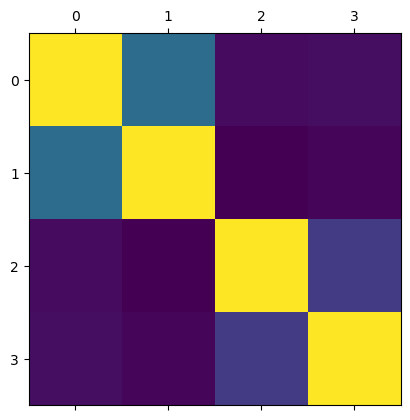

In [105]:
plt.matshow(Tabla_Pearson.corr())

En este caso no se puede evidenciar ninguna correlación entre las variables, por lo que se requiere hacer un análisis más concreto o especializado sobre las órdenes que estàn afectando la reputación de la empresa Olist, y se están entregando con retraso.